STUDENT NAME: Raymond Shum

CLASS: CST383-30_SP22

ASSIGNMENT: Week 7 - Lab 3

DUE DATE: Feb. 22, 2022

In [1]:
import numpy as np
import pandas as pd
from matplotlib import rcParams
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
import seaborn as sns
import graphviz 

from scipy.stats import zscore

In [2]:
# switch to seaborn default stylistic parameters
sns.set()
# larger plot fonts
sns.set_context('talk')
# change default plot size
rcParams['figure.figsize'] = 10,8

In [3]:
# read the cpu data
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv")
df.index = df['vendor']+' '+df['model']
df.drop(['vendor', 'model'], axis=1, inplace=True)
df['cs'] = np.round(1e3/df['myct'], 2)    # clock speed in MHz

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, adviser 32/60 to wang vs-90
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   myct    209 non-null    int64  
 1   mmin    209 non-null    int64  
 2   mmax    209 non-null    int64  
 3   cach    209 non-null    int64  
 4   chmin   209 non-null    int64  
 5   chmax   209 non-null    int64  
 6   prp     209 non-null    int64  
 7   erp     209 non-null    int64  
 8   cs      209 non-null    float64
dtypes: float64(1), int64(8)
memory usage: 16.3+ KB


In [5]:
df.describe()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp,cs
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144,13.610478
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102,12.157247
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000,0.670000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000,4.440000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000,9.090000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000,20.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000,58.820000


In [6]:
df.corr()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp,cs
myct,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396,-0.563436
mmin,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292,0.695432
mmax,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202,0.657323
cach,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620,0.486423
chmin,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580,0.491001
chmax,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156,0.242099
prp,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472,0.622062
erp,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000,0.603144
cs,-0.563436,0.695432,0.657323,0.486423,0.491001,0.242099,0.622062,0.603144,1.000000


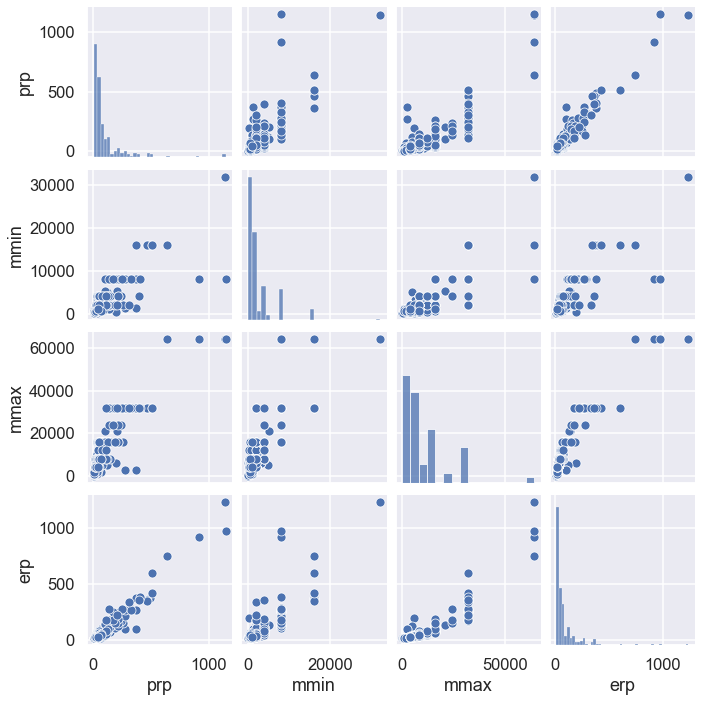

In [7]:
sns.pairplot(data=df[['prp','mmin','mmax','erp']])

In [8]:
def fit_predict(target,predictors):
    X = df[predictors].values
    y = df[target].values

    # test/train split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

    # train the model
    reg = DecisionTreeRegressor(max_depth=2)
    reg.fit(X_train, y_train)

    # make predictions and compute error
    y_predict = reg.predict(X_test)
    errors = y_test - y_predict
    rmse = np.sqrt((errors**2).mean())
    return rmse, reg

In [9]:
target = 'prp'

# starter code
predictors = ['mmin', 'chmax']
print("starter rmse:", fit_predict(target, predictors)[0].round(2))

# correlated predictors
predictors = ['mmin','mmax','erp']
print("correlated rmse:", fit_predict(target, predictors)[0].round(2))

starter rmse: 88.42
correlated rmse: 82.18


In [10]:
from sklearn.model_selection import GridSearchCV

predictors = ['mmin','mmax','erp']
X = df[predictors].values
y = df[target].values

# test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# train the model
reg = DecisionTreeRegressor()

params = {
    'max_depth' : range(1,15)
}

optimized_dcr = GridSearchCV(reg, params, n_jobs=-1)
optimized_dcr.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 15)})

In [11]:
optimized_dcr.best_params_

{'max_depth': 5}

In [12]:
opt_predict = optimized_dcr.predict(X_test)
rmse = np.sqrt(((opt_predict - y_test)**2).mean()).round(2)
print('optimized rmse:', rmse)

optimized rmse: 60.6


In [13]:
optimized_dcr.best_estimator_

DecisionTreeRegressor(max_depth=5)

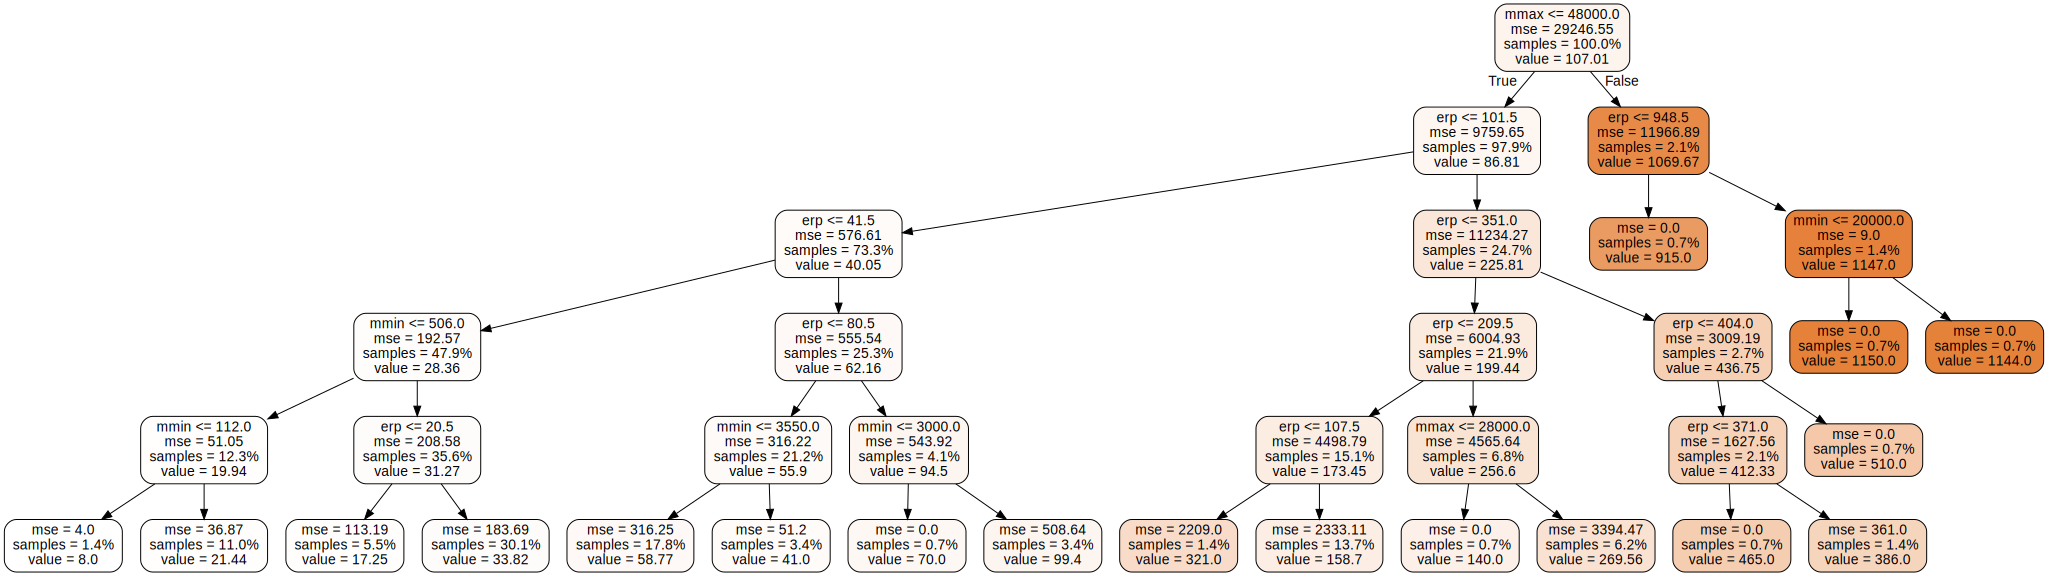

In [14]:
reg = DecisionTreeRegressor(max_depth=optimized_dcr.best_params_['max_depth'])
reg.fit(X_train, y_train)

dot_data = export_graphviz(reg, precision=2,
                     feature_names=predictors,  
                     proportion=True,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)  
graph


In [15]:
print('Feature Importances:')
for i, feature in enumerate(reg.feature_importances_):
    print(f'  {predictors[i]}: {feature:.3f}')

Feature Importances:
  mmin: 0.001
  mmax: 0.685
  erp: 0.314
